In [80]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import numpy as np



In [81]:
# Load your wine_quality data (replace 'your_data.csv' with the actual file name)
wine_data = pd.read_csv('winequality.csv')
wine_data.columns = wine_data.columns.str.replace(' ', '_')

# Separate features (X) and target variable (y)
X = wine_data.drop(['quality','type'], axis=1)
y = wine_data['quality']


In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#y_train = y_train - 3
#y_test = y_test - 3
# Define the numerical features and columns to impute
numeric_features = X.select_dtypes(np.number).columns#X.columns
numeric_cols = X[numeric_features]

categorical_features = X.select_dtypes(object).columns  # Replace with your actual categorical columns
categorical_cols = X[categorical_features]

# Create a preprocessor with imputation and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        #('cat', OrdinalEncoder(), categorical_features)
    ])

# Create the pipeline with the preprocessor and GradientBoostingClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators = 200,max_depth = 7, random_state=42))
    #('classifier', XGBClassifier(n_estimators = 200,max_depth = 7, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=7, n_estimators=200,
                                            random_state=42))])

In [83]:

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1 Score: {f1:.4f}')


Weighted F1 Score: 0.6707


/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and wil

In [84]:
from sklearn.metrics import f1_score,accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

0.6792307692307692

/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/berkan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

Confusion Matrix:
[[  0   0   2   0   0   0   0]
 [  1   9  24  10   1   0   1]
 [  1   8 311  98   1   0   1]
 [  0   1 103 437  37   1   0]
 [  0   1  11  88 117   4   0]
 [  0   0   0  12  11   9   0]
 [  0   0   0   0   0   0   0]]


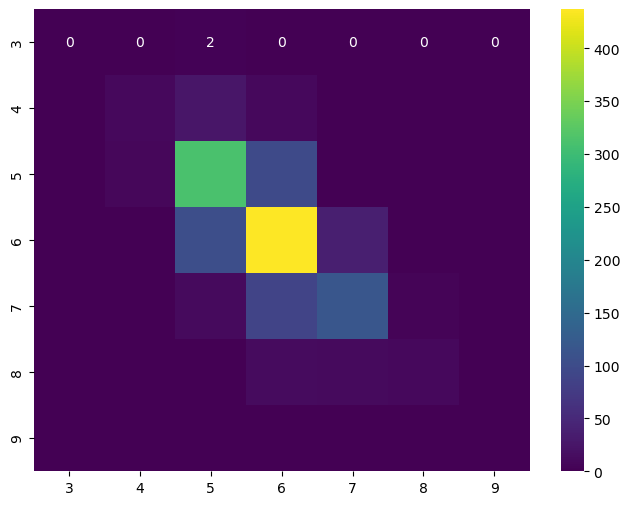

In [85]:
# Confusion Matrix
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='viridis', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
fig = cm.get_figure()